In [119]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns
from datetime import timedelta, datetime, tzinfo, timezone, time
from PIL import Image, ImageDraw
from numpy import asarray
from math import atan2,degrees,radians
from scipy.spatial import distance
import sys

In [2]:
def show_data():
    train_folder = [7554]#,7556,7557,7558,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(1,22):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            data.columns = data.columns.str.replace(' ', '')
            submit_time = data.iloc[-1][0]
            start_time = data.iloc[-2][0]
            data.dropna(inplace=True)
            data['X'] = data.X.astype(float)
            data.Time = data.Time.str.replace("00:","").astype(np.float64)
            
            fig=plt.figure(figsize=(20,5))

            ax= fig.add_subplot(1, 2, 1)
            ax.plot(data.Pressure,"#FF8000")
            ax.set_title("Pressure",fontdict={'fontsize': 20})

            ax2 = fig.add_subplot(1, 2, 2)
            ax2.plot(data.Time,c='b')
            ax2.set_title("Time",fontdict={'fontsize': 20})

            plt.show()
            hand_lifts = 0
            rolling_std = data.Time.rolling(window=20).std()

            for i in range(len(data.Time)-1):
                if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
                    hand_lifts +=1

            print("Number of hand lifts: " + str(hand_lifts))

>  Notice that file number 22 does not exist (there is only an empty image), we will ignore this file.

In [194]:
data = pd.read_csv(r'train/7554/SimpleTest/9.csv')

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          1103 non-null   object 
 1    Y         1101 non-null   float64
 2    Pressure  1101 non-null   float64
 3    TiltX     1101 non-null   float64
 4    TiltY     1101 non-null   float64
 5    Time      1101 non-null   object 
dtypes: float64(4), object(2)
memory usage: 51.8+ KB


In [196]:
#remove the extra spaces in the columns.
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,1059.92747430419,842.854833,0.076402,-4257.0,988.0,00:04.5448411
1,1059.92747430419,842.854833,0.076402,-4257.0,988.0,00:04.5604847
2,1060.55941794665,842.960157,0.083482,-4257.0,988.0,00:04.5761906


In [197]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)
print(start_time)
print(submit_time)

total_time = float(submit_time[37:]) - float(start_time[38:])
print("Total time drawing: 00:" +str(total_time))

Time Elapsed till drawing started: 00:04.5281163
Time Elapsed till drawing submit: 00:27.4825696
Total time drawing: 00:22.9544533


In [198]:
data['X'] = data.X.astype(float)

In [199]:
# change the Time column to float
data.Time = data.Time.str.replace("00:","").astype(np.float64)

```python
# other way to deal with the Time column
data.Time = data.Time.apply(lambda x: datetime.strptime(x[:-1],"%M:%S.%f"))
```

In [200]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,1059.927474,842.854833,0.076402,-4257.0,988.0,4.544841
1,1059.927474,842.854833,0.076402,-4257.0,988.0,4.560485
2,1060.559418,842.960157,0.083482,-4257.0,988.0,4.576191


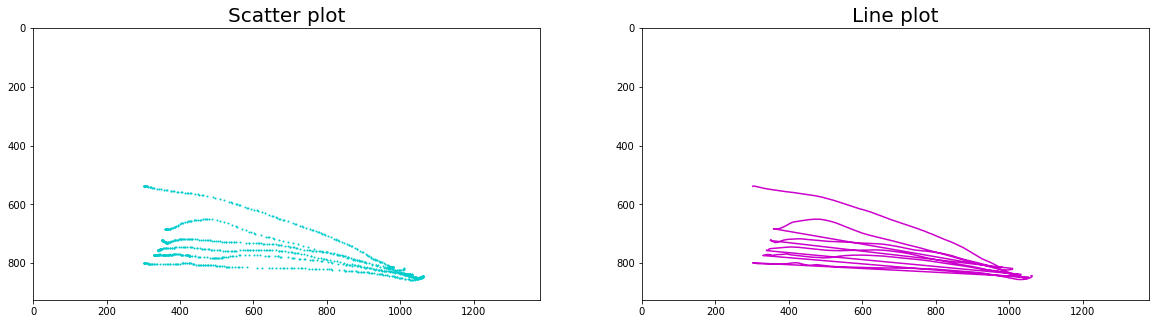

In [201]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='#00CCCC')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
ax.set_title("Scatter plot",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,"#CC00CC")
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)
ax2.set_title("Line plot",fontdict={'fontsize': 20})

plt.show()

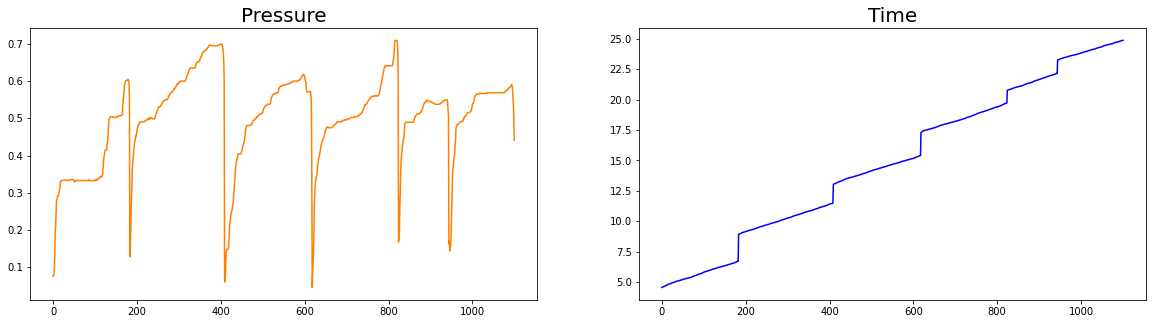

In [202]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

## *Hand lifts:*

In [203]:
hand_lifts = 0
rolling_std = data.Time.rolling(window=14).std()
index = [0]

for i in range(len(data.Time)-1):
    if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
        hand_lifts +=1
        index.append(i+1)
index.append(i+1)        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 5


## *Number of lines:*

In [204]:
def find_slope(X2,X1,Y2,Y1):
    slope = (float)(Y2-Y1)/(X2-X1)
    return slope

In [205]:
slopes = []
for i in range(0,len(data.X)-20,40):
    if (data.X[i+20] - data.X[i] == 0):
        continue
    else:
        slopes.append(find_slope(data.X[i+20],data.X[i],data.Y[i+20],data.Y[i]))

In [206]:
slopes = [] 
jump = 20
for i in range(0,len(data.X)-20,40):
    slopes.append(find_slope(data.X[i+jump], data.X[i], data.Y[i+jump],data.Y[i]))       
slopes = pd.Series(slopes)

#fig = plt.figure(figsize=(10, 4))
#plt.plot(slopes,"r")

In [207]:
numOfLines = 0
roll_std = slopes.rolling(window = 5).std()

for i in range(0,len(slopes)-1):
    if (abs(slopes[i+1] - slopes[i]) < 1) :
        continue
    elif (slopes [i+1] - roll_std[i] > slopes[i]) or (slopes[i] - roll_std[i] > slopes[i+1]):
        numOfLines = numOfLines + 1
        
if numOfLines == 0:
    numOfLines += 1

print("Number of lines: " + str(numOfLines))

Number of lines: 1


In [208]:
def calculateAngle(X1,X0,Y1,Y0):
    deltaX = (X1 - X0)
    deltaY = (Y1 - Y0)
    angle = (math.atan2(deltaY,deltaX))*(180/math.pi)
    if angle < 0:
        angle = 360 + angle
    return angle

In [209]:
angels = []
jump = int(len(data)/10)
for i in range(0,len(data.X)-jump):
    angels.append(int(calculateAngle(data.X[i+jump],data.X[i],data.Y[i+jump],data.Y[i])))
angels = pd.Series(angels)

#fig = plt.figure(figsize=(10, 4))
#plt.plot(angels,"r")

In [222]:
numOfLines = 0
roll_std = angels.rolling(window = 28).std()

for i in range(0,len(angels)-1):
    if (abs(angels[i+1] - angels[i]) < 1) :
        continue
    elif (angels [i+1] - 5 > angels[i]) or (angels[i] - 5 > angels[i+1]):
        numOfLines = numOfLines + 1
        
if numOfLines == 0:
    numOfLines += 1    
#else: numOfLines /=2

print("Number of lines: " + str(numOfLines))

Number of lines: 23


In [223]:
def dis_list(first_index,second_index):
    dis = [] 
    for i in range(first_index,second_index):
        b = (data.X[second_index-i],data.Y[second_index-i])
        a = (data.X[i],data.Y[i])
        dis.append(math.dist(a,b))
    return dis

In [212]:
d = dis_list(0,index[-1])
index

[0, 183, 409, 618, 824, 944, 1100]

In [213]:
first = (data.X[0], data.Y[0])
last = (data.X[index[-1]], data.Y[index[-1]])
dst = math.dist(first, last)
dst

816.7886263605336

In [214]:
epsilon = sys.float_info.epsilon
lines = 0

for j in range(len(d)):
    if (dst - d[j]) < epsilon:
        lines +=1
print(lines)

17


In [225]:
epsilon = sys.float_info.epsilon
lines = 0

for i in range(len(index)-1):
    first = (data.X[index[i]], data.Y[index[i]])
    last = (data.X[index[i+1]], data.Y[index[i+1]])
    dst = math.dist(first, last)
    
    dis = dis_list(index[i],index[i+1])

    for j in range(len(dis)):
        if (dst - dis[j]) < epsilon:
            lines +=1
    
print(lines)

918


### *Length of the lines:*

In [13]:
def Line_len(X1,Y1,X2,Y2):
    len = math.sqrt((X2-X1)**2 + (Y2-Y1)**2)
    return len

## *Open or closed shape:*
Only relevant for some of the drawings.

(3,4,8,11,13,16,17,19,20,21)

In [86]:
img = Image.open(r'train/7554/SimpleTest/3.PNG')
img = img.convert("RGB")
img = img.crop((0,220,1360,885))

In [87]:
target_pixel = (0,0)
target_color = (255,255,0)
ImageDraw.floodfill(img,target_pixel,target_color)#,thresh=0.5
im = asarray(img)

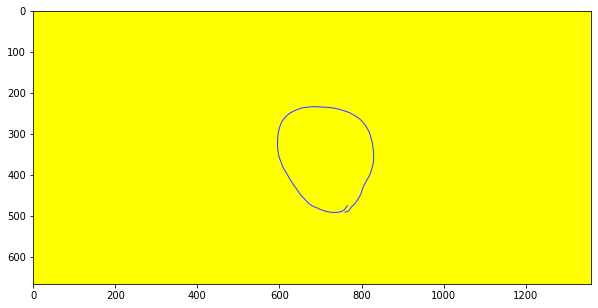

In [88]:
fig = plt.figure(figsize=(10, 7))  
plt.imshow(img)

In [89]:
count =0 
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
            #for q in range(3):
        if ((im[i][j] == [255,255,255]).all() == True):
            count+=1
if count == 0:
    print ("Open Shape")
else: 
    print ("Close Shape")

Open Shape


<IPython.core.display.Javascript object>


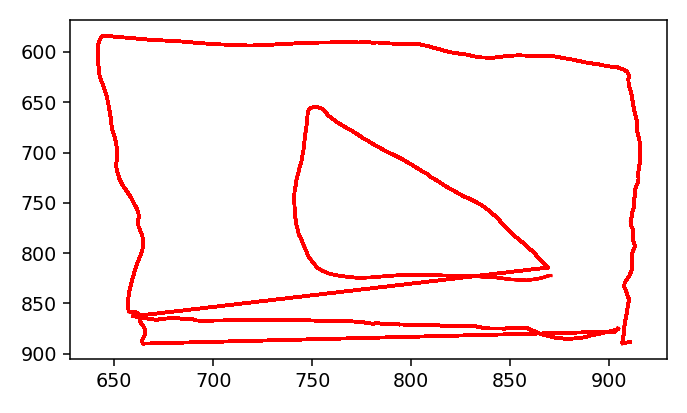

In [329]:
#import psutil
%matplotlib notebook

#plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [330]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()
